# Homework set 2

In [1]:
'''Packages'''
import numpy as np
from matplotlib import pyplot as plt

Consider the truncated KL expansion $Y^{d}_{t}, t \in [0,1]$, with eigenfunction $\psi_{i}(t)=\sin(\pi i t)$ and eigenvalues $\lambda_{i} = 1/(\pi i)^2$

In [2]:
def psi(i, t):
    return np.sin(np.pi * i * t)

def lambda_i(i):
    return 1/((np.pi * i)**2)

Construct and plot sample paths (i.e., realizations) of $Y^{d}_{t}$ with $d = 10, 100, 1000$ (multiple paths for each d). Try out both normal and uniform distributions, i.e. $\hat{Y}_{i}$ ∼ $N (0, 1)$ and $\hat{Y}_{i}$ ∼ $U [−1, 1]$

In [3]:
def Ydt(dist = 'norm'):
    
    if dist == 'norm':
        return np.random.normal(0, 1)
    
    else:
        return np.random.uniform(-1,1)

In [4]:
def KL_plotter(d, increments):
    # d is amount of realisations and increments amount of points for T
    
    # domain, max increment of sum, arrays for storing distributions
    T = np.linspace(0, 1, increments)
    sumrange = np.linspace(1, d, d)
    Ynorm = np.zeros(increments)
    Yunif = np.zeros(increments)
    
    # Page 30 of slides lecture 3
    i = 0
    for t in T:
        ynorm = 0
        yunif = 0
        
        for ii in sumrange:
            ynorm += np.random.normal(0, lambda_i(ii)) * psi(ii, t)
            yunif += np.sqrt(lambda_i(ii)) * psi(ii, t) * Ydt('unif')
        
        Ynorm[i] = ynorm
        Yunif[i] = yunif
        i = i + 1
    
    return [T, Ynorm, Yunif]

In [5]:
'''
Create Karhune-Loeve expansions
'''
data10 = KL_plotter(10, 50)
data100 = KL_plotter(100, 50)
data1000 = KL_plotter(1000, 50)

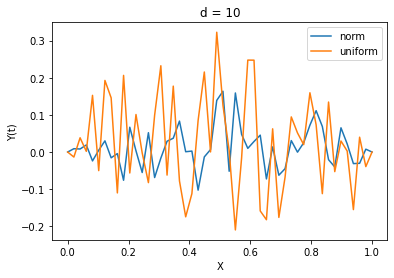

In [6]:
plt.plot(data10[0], data10[1], label = 'norm')
plt.plot(data10[0], data10[2], label = 'uniform')
plt.title('d = 10')
plt.ylabel('Y(t)')
plt.xlabel('X')
plt.legend()
plt.show()

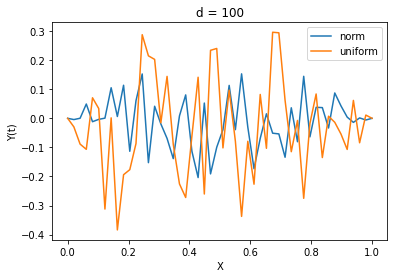

In [7]:
plt.plot(data100[0], data100[1], label = 'norm')
plt.plot(data100[0], data100[2], label = 'uniform')
plt.title('d = 100')
plt.ylabel('Y(t)')
plt.xlabel('X')
plt.legend()
plt.show()

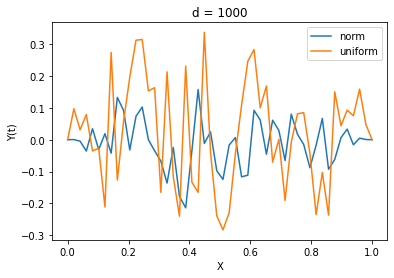

In [8]:
plt.plot(data1000[0], data1000[1], label = 'norm')
plt.plot(data1000[0], data1000[2], label = 'uniform')
plt.title('d = 1000')
plt.ylabel('Y(t)')
plt.xlabel('X')
plt.legend()
plt.show()